|Name|examnr.|
|----|-------|
|Shi Hui Huang|210418|

# Economies of scale at Dutch universities

Between the years 2000 and 2017 the number of Dutch students has increased with 68%, whereas the government has decided to cut back on their contribution to universities. As a consequence, the government contribution per student to universities has decreased with 25% between 2000 and 2017 ([vsnu, 2018](https://www.vsnu.nl/dalende-rijksbijdrage.html)). This means that Dutch universities have to fund a bigger share of the costs by themselves, which implies that it has become more important for universities to watch their costs. One way of cost saving is to take advantage of possible 'economies of scale'. Economies of scale occur when the average costs of a 'good' decrease when the amount of produced goods increase ([Stigler, 1958](https://www-jstor-org.tilburguniversity.idm.oclc.org/stable/724882?seq=1#metadata_info_tab_contents)). Applying this to the case of Dutch universities, economies of scale exist when the average cost per student decreases if the number of students increase.

Previous research has already shown that economies of scale are present at American universities ([Koshal & Koshal, 1999](https://pdfs.semanticscholar.org/de80/7630af5c8bbc34bfcbbd67f3f6c93b7ab0f5.pdf)). I will investigate the cost curve of Dutch universities to see if this could also be the case for Dutch universities.

**Research question:** Could Dutch universities achieve economies of scale between 2013 and 2017 by increasing the number of students?

As the motivation for the research question is the decrease of the government contribution per student, I focus on the thirtheen Dutch universities that receive government contribution:
* Erasmus Universiteit Rotterdam
* Radboud Universiteit Nijmegen
* Rijksuniversiteit Groningen
* Technische Universiteit Delft
* Technische Universiteit Eindhoven
* Tilburg University
* Universiteit Leiden
* Universiteit Maastricht
* Universiteit Twente
* Universiteit Utrecht
* Universiteit van Amsterdam
* Vrije Universiteit Amsterdam
* Wageningen University

To investigate the research question, we need to estimate the average cost curve of Dutch universities. The average cost curve in this case shows the relationship between the average costs per student and the number of students at a Dutch university. If their exist economies of scale, the average cost curve will show a declining pattern.

The notebook proceeds with the required steps in python to estimate the average cost curve of Dutch universities. Afterwards, an answer to the research question will be provided.

## Relevant python packages

We start with importing the python packages that we will be using.

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random
import wbdata as wb

plt.style.use('seaborn')
%matplotlib inline

## Datafile 1: Student numbers

The first datafile that we use is a datafile that contains the number of students at Dutch universities for the years 2013-2017. This datafile is downloaded from [Dienst Uitvoering Onderwijs](https://duo.nl/open_onderwijsdata/databestanden/ho/ingeschreven/wo-ingeschr/ingeschrevenen-wo1.jsp), the Dutch Education Executive Agency. Before reading the CSV file into a DataFrame, it is necessary to save the file as a CSV UTF-8 file. We want to convert the datafile to a DataFrame with three columns, a column with the name of the university, a column with the year, and a column with the number of students.

In [2]:
# Read the CSV file into a DataFrame
df_students=pd.read_csv('data/01.ingeschrevenen-wo-2017_UTF-8.csv', sep=';')

# Display the DataFrame
df_students

,PROVINCIE,GEMEENTENUMMER,GEMEENTENAAM,SOORT INSTELLING,TYPE HOGER ONDERWIJS,BRIN NUMMER ACTUEEL,INSTELLINGSNAAM ACTUEEL,CROHO ONDERDEEL,CROHO SUBONDERDEEL,OPLEIDINGSCODE ACTUEEL,...,2013 MAN,2013 VROUW,2014 MAN,2014 VROUW,2015 MAN,2015 VROUW,2016 MAN,2016 VROUW,2017 MAN,2017 VROUW
0,Gelderland,200.0,APELDOORN,WO kleine univ.,bachelor,21QO,Theologische Universiteit Apeldoorn,taal en cultuur,n.v.t. (taal en cultuur),56109.0,...,27.0,7.0,23.0,8.0,28.0,11.0,31.0,10.0,21.0,7.0
1,Gelderland,200.0,APELDOORN,WO kleine univ.,bachelor,21QO,Theologische Universiteit Apeldoorn,taal en cultuur,n.v.t. (taal en cultuur),56109.0,...,19.0,7.0,31.0,9.0,18.0,5.0,17.0,7.0,23.0,9.0
2,Gelderland,200.0,APELDOORN,WO kleine univ.,master,21QO,Theologische Universiteit Apeldoorn,taal en cultuur,n.v.t. (taal en cultuur),60257.0,...,41.0,3.0,40.0,3.0,36.0,2.0,28.0,2.0,33.0,3.0
3,Gelderland,268.0,NIJMEGEN,reguliere inst.,bachelor,21PM,Radboud Universiteit Nijmegen,economie,n.v.t. (economie),50645.0,...,263.0,206.0,257.0,221.0,272.0,236.0,295.0,254.0,311.0,294.0
4,Gelderland,268.0,NIJMEGEN,reguliere inst.,bachelor,21PM,Radboud Universiteit Nijmegen,economie,n.v.t. (economie),50645.0,...,304.0,163.0,313.0,158.0,269.0,149.0,287.0,154.0,394.0,202.0
5,Gelderland,268.0,NIJMEGEN,reguliere inst.,bachelor,21PM,Radboud Universiteit Nijmegen,economie,n.v.t. (economie),50950.0,...,130.0,70.0,135.0,54.0,159.0,72.0,188.0,81.0,198.0,94.0
6,Gelderland,268.0,NIJMEGEN,reguliere inst.,bachelor,21PM,Radboud Universiteit Nijmegen,economie,n.v.t. (economie),50950.0,...,188.0,52.0,217.0,66.0,222.0,60.0,204.0,68.0,216.0,76.0
7,Gelderland,268.0,NIJMEGEN,reguliere inst.,bachelor,21PM,Radboud Universiteit Nijmegen,gedrag en maatschappij,n.v.t. (gedrag en maatschappij),50035.0,...,21.0,100.0,18.0,115.0,20.0,92.0,19.0,76.0,21.0,75.0
8,Gelderland,268.0,NIJMEGEN,reguliere inst.,bachelor,21PM,Radboud Universiteit Nijmegen,gedrag en maatschappij,n.v.t. (gedrag en maatschappij),50035.0,...,8.0,61.0,16.0,34.0,18.0,44.0,15.0,44.0,14.0,43.0
9,Gelderland,268.0,NIJMEGEN,reguliere inst.,bachelor,21PM,Radboud Universiteit Nijmegen,gedrag en maatschappij,n.v.t. (gedrag en maatschappij),56601.0,...,23.0,46.0,28.0,67.0,26.0,66.0,27.0,60.0,25.0,63.0


As displayed in the DataFrame above, the DataFrame contains a lot of columns and some rows that we do not need. We start with dropping these columns and rows, and we rename the column that we need to 'University'.

In [3]:
# Drop the columns that we do not need
df_students.drop(['PROVINCIE',
                 'GEMEENTENUMMER',
                 'GEMEENTENAAM',
                 'SOORT INSTELLING',
                 'TYPE HOGER ONDERWIJS',
                 'BRIN NUMMER ACTUEEL',
                 'CROHO ONDERDEEL',
                 'CROHO SUBONDERDEEL',
                 'OPLEIDINGSCODE ACTUEEL',
                 'OPLEIDINGSNAAM ACTUEEL',
                 'OPLEIDINGSVORM',
                 'OPLEIDINGSFASE ACTUEEL'],inplace=True,axis=1)

# Drop the rows that we do not need
df_students.drop([2223,2224],inplace=True)

# Rename the column 'INSTELLINGSNAAM ACTUEEL' to 'University'
df_students=df_students.rename({'INSTELLINGSNAAM ACTUEEL':'University'},axis='columns')

# Display the head of the DataFrame that remains after the previous steps
df_students.head()

,University,2013 MAN,2013 VROUW,2014 MAN,2014 VROUW,2015 MAN,2015 VROUW,2016 MAN,2016 VROUW,2017 MAN,2017 VROUW
0,Theologische Universiteit Apeldoorn,27.0,7.0,23.0,8.0,28.0,11.0,31.0,10.0,21.0,7.0
1,Theologische Universiteit Apeldoorn,19.0,7.0,31.0,9.0,18.0,5.0,17.0,7.0,23.0,9.0
2,Theologische Universiteit Apeldoorn,41.0,3.0,40.0,3.0,36.0,2.0,28.0,2.0,33.0,3.0
3,Radboud Universiteit Nijmegen,263.0,206.0,257.0,221.0,272.0,236.0,295.0,254.0,311.0,294.0
4,Radboud Universiteit Nijmegen,304.0,163.0,313.0,158.0,269.0,149.0,287.0,154.0,394.0,202.0


As we can see, the number of students are separated for men ('MAN') and women ('VROUW'). In the next steps we merge these columns.

In [4]:
# Add up the male and female students to one column
df_students['2013']= df_students['2013 MAN']+df_students['2013 VROUW']
df_students['2014']= df_students['2014 MAN']+df_students['2014 VROUW']
df_students['2015']= df_students['2015 MAN']+df_students['2015 VROUW']
df_students['2016']= df_students['2016 MAN']+df_students['2016 VROUW']
df_students['2017']= df_students['2017 MAN']+df_students['2017 VROUW']

# Drop the columns for male and female students
df_students.drop(['2013 MAN',
                 '2013 VROUW',
                 '2014 MAN',
                 '2014 VROUW',
                 '2015 MAN',
                 '2015 VROUW',
                 '2016 MAN',
                 '2016 VROUW',
                 '2017 MAN',
                 '2017 VROUW',],inplace=True,axis=1)

# Display the DataFrame that remains after the previous steps
df_students

,University,2013,2014,2015,2016,2017
0,Theologische Universiteit Apeldoorn,34.0,31.0,39.0,41.0,28.0
1,Theologische Universiteit Apeldoorn,26.0,40.0,23.0,24.0,32.0
2,Theologische Universiteit Apeldoorn,44.0,43.0,38.0,30.0,36.0
3,Radboud Universiteit Nijmegen,469.0,478.0,508.0,549.0,605.0
4,Radboud Universiteit Nijmegen,467.0,471.0,418.0,441.0,596.0
5,Radboud Universiteit Nijmegen,200.0,189.0,231.0,269.0,292.0
6,Radboud Universiteit Nijmegen,240.0,283.0,282.0,272.0,292.0
7,Radboud Universiteit Nijmegen,121.0,133.0,112.0,95.0,96.0
8,Radboud Universiteit Nijmegen,69.0,50.0,62.0,59.0,57.0
9,Radboud Universiteit Nijmegen,69.0,95.0,92.0,87.0,88.0


Now we will add up the students for each university.

In [5]:
# Add up the students for each individual university
df_students=df_students.groupby(['University']).sum()

# Display the DataFrame that remains after the previous step
df_students

,2013,2014,2015,2016,2017
University,,,,,
Erasmus Universiteit Rotterdam,22075.0,22465.0,23228.0,24451.0,25922.0
Hanzehogeschool Groningen,0.0,16.0,36.0,71.0,93.0
Hogeschool van Amsterdam,0.0,0.0,0.0,0.0,39.0
NHTV Internationale Hogeschool Breda,75.0,74.0,75.0,79.0,74.0
Protestantse Theologische Universiteit,259.0,233.0,213.0,200.0,199.0
Radboud Universiteit Nijmegen,18459.0,18728.0,18899.0,19339.0,20442.0
Rijksuniversiteit Groningen,27140.0,27930.0,27867.0,28452.0,29331.0
Technische Universiteit Delft,19148.0,20034.0,21475.0,22220.0,23325.0
Technische Universiteit Eindhoven,8377.0,9209.0,10116.0,10759.0,11372.0


We see that the DataFrame also contains universities that we do not take into consideration in our research question, namely universities that do not receive government contribution. We need to drop these universities.

In [6]:
# Drop the universities that we do not need
df_students=df_students.drop(['Hanzehogeschool Groningen',
                  'Hogeschool van Amsterdam',
                  'NHTV Internationale Hogeschool Breda',
                  'Protestantse Theologische Universiteit',
                  'Theologische Universiteit Apeldoorn',
                  'Theologische Universiteit Kampen',
                  'Universiteit voor Humanistiek',
                  'transnationale Universiteit Limburg'])

# Display the DataFrame after the previous step
df_students

,2013,2014,2015,2016,2017
University,,,,,
Erasmus Universiteit Rotterdam,22075.0,22465.0,23228.0,24451.0,25922.0
Radboud Universiteit Nijmegen,18459.0,18728.0,18899.0,19339.0,20442.0
Rijksuniversiteit Groningen,27140.0,27930.0,27867.0,28452.0,29331.0
Technische Universiteit Delft,19148.0,20034.0,21475.0,22220.0,23325.0
Technische Universiteit Eindhoven,8377.0,9209.0,10116.0,10759.0,11372.0
Tilburg University,12589.0,12122.0,12434.0,13043.0,14244.0
Universiteit Leiden,23039.0,24215.0,25464.0,26491.0,27713.0
Universiteit Maastricht,14895.0,15201.0,15861.0,15980.0,16600.0
Universiteit Twente,9315.0,9263.0,9082.0,9391.0,9921.0


By using `df_students.dtypes` we see that the DataFrame that we have contains 'float' values. We convert these values to integers.

In [7]:
# Investigate the type of the values in the DataFrame
df_students.dtypes

2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object

In [8]:
# Convert the values in the DataFrame to integers
df_students=df_students.astype(int)

# Display the DataFrame after the previous step
df_students

,2013,2014,2015,2016,2017
University,,,,,
Erasmus Universiteit Rotterdam,22075,22465,23228,24451,25922
Radboud Universiteit Nijmegen,18459,18728,18899,19339,20442
Rijksuniversiteit Groningen,27140,27930,27867,28452,29331
Technische Universiteit Delft,19148,20034,21475,22220,23325
Technische Universiteit Eindhoven,8377,9209,10116,10759,11372
Tilburg University,12589,12122,12434,13043,14244
Universiteit Leiden,23039,24215,25464,26491,27713
Universiteit Maastricht,14895,15201,15861,15980,16600
Universiteit Twente,9315,9263,9082,9391,9921


Now we are going to reset the index and add a new column for the universities.

In [9]:
# Reset the index
df_students=df_students.reset_index(drop=True)

# Add a new column for the universities
df_students.insert(0, 'University',
                   ['Erasmus Universiteit Rotterdam',
                    'Radboud Universiteit Nijmegen',
                    'Rijksuniversiteit Groningen',
                    'Technische Universiteit Delft',
                    'Technische Universiteit Eindhoven',
                    'Tilburg University',
                    'Universiteit Leiden',
                    'Universiteit Maastricht',
                    'Universiteit Twente',
                    'Universiteit Utrecht',
                    'Universiteit van Amsterdam',
                    'Vrije Universiteit Amsterdam',
                    'Wageningen University'])

# Display the DataFrame after the previous steps
df_students

,University,2013,2014,2015,2016,2017
0,Erasmus Universiteit Rotterdam,22075,22465,23228,24451,25922
1,Radboud Universiteit Nijmegen,18459,18728,18899,19339,20442
2,Rijksuniversiteit Groningen,27140,27930,27867,28452,29331
3,Technische Universiteit Delft,19148,20034,21475,22220,23325
4,Technische Universiteit Eindhoven,8377,9209,10116,10759,11372
5,Tilburg University,12589,12122,12434,13043,14244
6,Universiteit Leiden,23039,24215,25464,26491,27713
7,Universiteit Maastricht,14895,15201,15861,15980,16600
8,Universiteit Twente,9315,9263,9082,9391,9921
9,Universiteit Utrecht,30143,30371,30354,30523,30945


The last step regarding the students datafile is to convert the year columns to rows.

In [10]:
# Convert year columns to rows
df_students=pd.melt(df_students, id_vars=['University'], var_name='Year', value_name='Number_of_students')

# Display the DataFrame after the previous step
df_students

,University,Year,Number_of_students
0,Erasmus Universiteit Rotterdam,2013,22075
1,Radboud Universiteit Nijmegen,2013,18459
2,Rijksuniversiteit Groningen,2013,27140
3,Technische Universiteit Delft,2013,19148
4,Technische Universiteit Eindhoven,2013,8377
5,Tilburg University,2013,12589
6,Universiteit Leiden,2013,23039
7,Universiteit Maastricht,2013,14895
8,Universiteit Twente,2013,9315
9,Universiteit Utrecht,2013,30143


## Datafile 2: costs

The second datafile that we will use is contains the costs of the Dutch universities for the years 2013-2017. This datafile is obtained from [Rathenau Instituut](https://www.rathenau.nl/nl/wetenschap-cijfers/geld/inkomsten-uitgaven-van-universiteiten-en-hogescholen/uitgaven-nederlandse). Before reading the CSV file into a DataFrame, it is necessary to save the relevant tab ('Lasten') of the Excel file as a CSV UTF-8 file. We want to convert the datafile to a DataFrame with three columns, one for the university name, one for the year, and one for the total costs.

In [11]:
# Read the CSV file as a DataFrame
df_costs=pd.read_csv('data/Universitaire_baten_en_lasten_vanaf_2000_5_UTF-8.csv', sep=';',header=4)

# Display the DataFrame
df_costs

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 15
0,LEI,"267,9","290,3","301,9","314,0","447,1","462,8","473,1","488,5","488,2","512,2","525,5","558,2","585,7","614,0",NaN
1,UU,"575,2","619,8","616,7","643,7","706,6","765,7","743,4","756,4","744,2","736,7","755,8","776,2","797,2","827,9",NaN
2,RUG,"422,0","418,7","415,8","425,4","481,2","542,7","575,4","595,5","614,4","607,8","603,2","628,5","644,8","652,6",NaN
3,EUR,"321,3","335,1","351,6","386,4","414,7","454,1","483,8","518,8","508,8","533,1","532,4","538,1","572,2","606,9",NaN
4,UM,"223,8","237,5","231,9","250,4","295,6","332,6","346,8","346,9","345,1","354,1","372,7","395,9","398,8","414,0",NaN
5,UvA,"404,9","421,0","409,8","417,1","518,2","561,4","569,2","596,9","619,6","589,2","597,9","715,7","735,2","754,8",NaN
6,VU,"278,6","290,4","307,5","312,7","406,4","431,5","432,9","451,9","459,5","485,9","493,5","498,2","492,9","492,2",NaN
7,RU,"359,6","385,2","397,2","405,6","442,4","462,0","479,4","500,3","513,9","537,6","528,0","552,0","543,9","554,3",NaN
8,UvT,"125,5","130,7","139,1","155,8","176,0","190,4","200,8","201,1","201,0","189,7","192,4","191,4","198,9","214,9",NaN
9,TUD,"440,1","454,6","472,5","470,6","569,5","557,7","530,6","524,4","532,9","551,1","582,0","606,7","625,1","664,0",NaN


We see that the DataFrame is quite messy. To clean up the DataFrame, we start with dropping the columns and rows that we do not need.

In [12]:
# Limit the DataFram to the first 13 lines
df_costs=df_costs[:13]

# Drop the columns of the DataFrame that we do not need
df_costs.drop(['Unnamed: 0',
               '2004',
               '2005',
               '2006',
               '2007',
               '2008',
               '2009',
               '2010',
               '2011',
               '2012',
               'Unnamed: 15'],inplace=True,axis=1)

# Display the DataFrame after the previous steps
df_costs

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,2013,2014,2015,2016,2017
0,"512,2","525,5","558,2","585,7","614,0"
1,"736,7","755,8","776,2","797,2","827,9"
2,"607,8","603,2","628,5","644,8","652,6"
3,"533,1","532,4","538,1","572,2","606,9"
4,"354,1","372,7","395,9","398,8","414,0"
5,"589,2","597,9","715,7","735,2","754,8"
6,"485,9","493,5","498,2","492,9","492,2"
7,"537,6","528,0","552,0","543,9","554,3"
8,"189,7","192,4","191,4","198,9","214,9"
9,"551,1","582,0","606,7","625,1","664,0"


By using `df_costs.dtypes` we see that the DataFrame that we have contains 'object' values. We need to convert these values to integers. Furthermore, we need to multiply these values because the values are in millions in which the comma is used to separate the digits.

In [13]:
# Investigate the values of the DataFrame
df_costs.dtypes

2013    object
2014    object
2015    object
2016    object
2017    object
dtype: object

In [14]:
# Delete the commas from the DataFrame
df_costs=df_costs.apply(lambda x: x.str.replace(',',''))

# Convert the values of the DataFrame to integers
df_costs=df_costs.astype(int)

# Multiply the values in the DataFrame with 100,000
df_costs=df_costs.multiply(1000000)

# Display the DataFrame after the previous steps
df_costs

,2013,2014,2015,2016,2017
0,5122000000,5255000000,5582000000,5857000000,6140000000
1,7367000000,7558000000,7762000000,7972000000,8279000000
2,6078000000,6032000000,6285000000,6448000000,6526000000
3,5331000000,5324000000,5381000000,5722000000,6069000000
4,3541000000,3727000000,3959000000,3988000000,4140000000
5,5892000000,5979000000,7157000000,7352000000,7548000000
6,4859000000,4935000000,4982000000,4929000000,4922000000
7,5376000000,5280000000,5520000000,5439000000,5543000000
8,1897000000,1924000000,1914000000,1989000000,2149000000
9,5511000000,5820000000,6067000000,6251000000,6640000000


Now we need to insert a column with the universities. The names of the universities correspond with the abbreviations of the initial DataFrame.

In [15]:
# Insert a column with the universities
df_costs.insert(0, 'University', 
                   ['Universiteit Leiden',
                    'Universiteit Utrecht',
                    'Rijksuniversiteit Groningen',
                    'Erasmus Universiteit Rotterdam',
                    'Universiteit Maastricht',
                    'Universiteit van Amsterdam',
                    'Vrije Universiteit Amsterdam',
                    'Radboud Universiteit Nijmegen',
                    'Tilburg University',
                    'Technische Universiteit Delft',
                    'Technische Universiteit Eindhoven',
                    'Universiteit Twente',
                    'Wageningen University'])

# Display the DataFrame after the previous step
df_costs

,University,2013,2014,2015,2016,2017
0,Universiteit Leiden,5122000000,5255000000,5582000000,5857000000,6140000000
1,Universiteit Utrecht,7367000000,7558000000,7762000000,7972000000,8279000000
2,Rijksuniversiteit Groningen,6078000000,6032000000,6285000000,6448000000,6526000000
3,Erasmus Universiteit Rotterdam,5331000000,5324000000,5381000000,5722000000,6069000000
4,Universiteit Maastricht,3541000000,3727000000,3959000000,3988000000,4140000000
5,Universiteit van Amsterdam,5892000000,5979000000,7157000000,7352000000,7548000000
6,Vrije Universiteit Amsterdam,4859000000,4935000000,4982000000,4929000000,4922000000
7,Radboud Universiteit Nijmegen,5376000000,5280000000,5520000000,5439000000,5543000000
8,Tilburg University,1897000000,1924000000,1914000000,1989000000,2149000000
9,Technische Universiteit Delft,5511000000,5820000000,6067000000,6251000000,6640000000


The last step regarding the costs datafile is to convert the year columns to rows.

In [16]:
# Convert the year columns to rows
df_costs=pd.melt(df_costs, id_vars=['University'], var_name='Year', value_name='Total_costs')

# Display the DataFrame after the previous step
df_costs

,University,Year,Total_costs
0,Universiteit Leiden,2013,5122000000
1,Universiteit Utrecht,2013,7367000000
2,Rijksuniversiteit Groningen,2013,6078000000
3,Erasmus Universiteit Rotterdam,2013,5331000000
4,Universiteit Maastricht,2013,3541000000
5,Universiteit van Amsterdam,2013,5892000000
6,Vrije Universiteit Amsterdam,2013,4859000000
7,Radboud Universiteit Nijmegen,2013,5376000000
8,Tilburg University,2013,1897000000
9,Technische Universiteit Delft,2013,5511000000


## The average cost curve of Dutch universities

Now that the two datafiles are cleaned up and converted to the preferred form, we are going to merge them into one datafile. The merged datafile will be used to plot the average cost curve of Dutch universities.

In [17]:
# Merge the students datafile with the costs datafile
df_merged=pd.merge(df_students,df_costs,on=['University', 'Year'])

# Display the merged datafile
df_merged

,University,Year,Number_of_students,Total_costs
0,Erasmus Universiteit Rotterdam,2013,22075,5331000000
1,Radboud Universiteit Nijmegen,2013,18459,5376000000
2,Rijksuniversiteit Groningen,2013,27140,6078000000
3,Technische Universiteit Delft,2013,19148,5511000000
4,Technische Universiteit Eindhoven,2013,8377,3085000000
5,Tilburg University,2013,12589,1897000000
6,Universiteit Leiden,2013,23039,5122000000
7,Universiteit Maastricht,2013,14895,3541000000
8,Universiteit Twente,2013,9315,3203000000
9,Universiteit Utrecht,2013,30143,7367000000


For the final graph, we need to add a column that shows the average costs of a university per student.

In [18]:
# Add the average costs column
df_merged['Average_costs']= df_merged['Total_costs']/df_merged['Number_of_students']

# Display the merged datafile
df_merged

,University,Year,Number_of_students,Total_costs,Average_costs
0,Erasmus Universiteit Rotterdam,2013,22075,5331000000,241494.903737
1,Radboud Universiteit Nijmegen,2013,18459,5376000000,291240.045506
2,Rijksuniversiteit Groningen,2013,27140,6078000000,223949.889462
3,Technische Universiteit Delft,2013,19148,5511000000,287810.737414
4,Technische Universiteit Eindhoven,2013,8377,3085000000,368270.263818
5,Tilburg University,2013,12589,1897000000,150687.107793
6,Universiteit Leiden,2013,23039,5122000000,222318.677026
7,Universiteit Maastricht,2013,14895,3541000000,237730.782142
8,Universiteit Twente,2013,9315,3203000000,343853.998926
9,Universiteit Utrecht,2013,30143,7367000000,244401.685300


To create the average cost curve, we plot the average costs per student against the number of students.

In [19]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()

hover=HoverTool(tooltips=[('University','@University'), ('Year', '@Year')])

plot=figure(tools=[hover])
plot.circle('Number_of_students', 'Average_costs', size=10, source=df_merged)
output_file('economies_of_scale.html')
plot.xaxis.axis_label = 'Number of students'
plot.yaxis.axis_label = 'Average costs per student'
show(plot)

Loading BokehJS ...

Unfortunately, Bokeh plots cannot be displayed inline in notebook previews on GitHub. Therefore, we also plot the graph with Matplotlib.


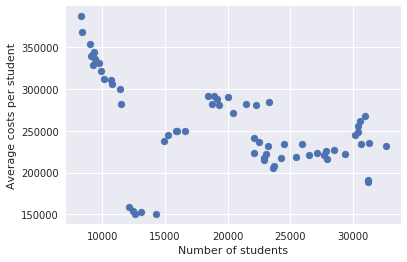

In [20]:
plt.scatter(df_merged.Number_of_students,df_merged.Average_costs)
plt.xlabel('Number of students')
plt.ylabel('Average costs per student')
plt.show()

## Discussion and conclusion

From the average cost curve of Dutch universities we can observe a declining pattern. This suggest that there could exist economies of scale for Dutch universities by increasing the number of students. However, we should be very careful with interpreting the finding because of the limited sample size, and because the graph does not take into account university-fixed effects and time-fixed effects. A reccomendation for future research is to use regression analysis to investigate whether Dutch universities could achieve economiese of scale by increasing the number of students.